# TEST NOTEBOOK

In [1]:
from utils import find_coeffs, print_code
import inspect
from subprocess import check_output
from IPython.core.display import HTML

output = print_code(find_coeffs)
HTML(output)

In [22]:
print(inspect.getsource(find_coeffs))

def find_coeffs(pa, pb): # https://stackoverflow.com/questions/14177744/how-does-perspective-transformation-work-in-pil
    matrix = []
    for p1, p2 in zip(pa, pb):
        matrix.append([p1[0], p1[1], 1, 0, 0, 0, -p2[0]*p1[0], -p2[0]*p1[1]])
        matrix.append([0, 0, 0, p1[0], p1[1], 1, -p2[1]*p1[0], -p2[1]*p1[1]])

    A = np.matrix(matrix, dtype=float)
    B = np.array(pb).reshape(8)

    res = np.dot(np.linalg.inv(A.T * A) * A.T, B)
    return np.array(res).reshape(8)



In [23]:
from utils import find_coeffs
import inspect
from subprocess import check_output
from IPython.core.display import HTML

output = check_output(["pygmentize", "-f", "html", "-O", "noclasses,lineanchors,linenos,style=native", "-l", "python"],
                     input=inspect.getsource(find_coeffs), encoding='ascii')

# Define a custom CSS class to align the code to the left
custom_css = """
<style>
.code {
    text-align: left;
    background-color: black; /* Set the background color */
    }
</style>
"""

# Embed the code block in a div with the custom CSS class
html_code = f"""
{custom_css}
<div class="code">
{output}
</div>
"""

HTML(html_code)


1 2 3 4 5 6 7 8 9 10 11


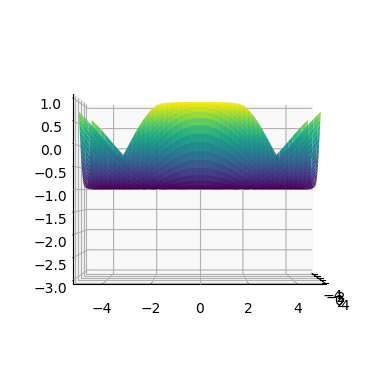

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create some example data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the view angles using view_init
ax.view_init(azim=0, elev=0)

# Set the view coordinates by adjusting the axis limits
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-3, 1)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, cmap='viridis')

plt.show()


In [25]:
def generate_range(mean, height):
    # Calculate the lower and upper bounds for the range
    lower_bound = min(0, 2*mean - height)
    upper_bound = max(height, 2*mean)
    
    # Return the range as a tuple
    return (lower_bound, upper_bound)

mean_value = -2
height_value = 10
result_range = generate_range(mean_value, height_value)
print(result_range)

(-14, 10)


In [26]:
from subprocess import check_output
from IPython.display import HTML
import inspect

def pygmentize_source_code(source_code, language="python"):
    # Define the Pygmentize command and arguments
    command = ["pygmentize", "-f", "html", "-O", "noclasses, lineanchors,style=native", "-l", language]

    # Get the HTML output using check_output
    output = check_output(command, input=source_code, encoding="ascii")

    # Display the HTML using IPython.display
    return HTML(output)

# Example usage:
# def find_coeffs(x, y):
#     return x + y

source_code = inspect.getsource(find_coeffs)
html_output = pygmentize_source_code(source_code, language="python")
html_output


In [6]:
import numpy as np

def calculate_points(direction, radius, turbine_origin):
    angle = np.deg2rad(direction)  # Convert direction to radians if necessary
    x_offset = radius * np.cos(angle)
    y_offset = radius * np.sin(angle)

    point1 = np.array([turbine_origin[0] - x_offset, turbine_origin[1] - y_offset, 0])
    point2 = np.array([turbine_origin[0] + x_offset, turbine_origin[1] + y_offset, 0])

    return point1, point2

# Example usage:
direction = 180  # Angle in degrees
radius = 10  # Radius
turbine_origin = np.array([0, 0, 0])  # Origin point

point1, point2 = calculate_points(direction, radius, turbine_origin)
print("Point 1:", point1)
print("Point 2:", point2)


Point 1: [ 1.0000000e+01 -1.2246468e-15  0.0000000e+00]
Point 2: [-1.0000000e+01  1.2246468e-15  0.0000000e+00]


In [2]:
import numpy as np
object_position = np.array([1, -1])  # Replace with your own vector
scale_factor = 1

def object_frame_boundaries(object_position, scale_factor):

    object_position_normalized = object_position / np.linalg.norm(object_position)

    # Calculate two perpendicular vectors with a total length of 1
    perpendicular_vector1 = np.array([-object_position_normalized[1], object_position_normalized[0]])
    perpendicular_vector2 = np.array([object_position_normalized[1], -object_position_normalized[0]])

    # Scale the perpendicular vectors to have a total length of scale_factor
    scale_factor = 1 / np.linalg.norm(perpendicular_vector1)
    perpendicular_vector1 *= scale_factor
    perpendicular_vector2 *= scale_factor

    # Calculate the end positions of the perpendicular vectors
    end_position1 = object_position + perpendicular_vector1
    end_position2 = object_position + perpendicular_vector2
    return end_position1, end_position2

end_position1, end_position2 = object_frame_boundaries(object_position, scale_factor)
print("End position of perpendicular vector 1:", end_position1)
print("End position of perpendicular vector 2:", end_position2)


End position of perpendicular vector 1: [ 1.70710678 -0.29289322]
End position of perpendicular vector 2: [ 0.29289322 -1.70710678]


In [43]:
import numpy as np
object_position = np.array([2, -2.0])  # Replace with your own vector
scale_factor = 5

def object_frame_boundaries(object_position, scale_factor):
    perp_vector = np.array([-object_position[1], object_position[0]])
    perp_vector = perp_vector/(np.linalg.norm(perp_vector) / scale_factor)
    return object_position + perp_vector, object_position - perp_vector
end_position1, end_position2 = object_frame_boundaries(object_position, scale_factor)
print("End position of perpendicular vector 1:", end_position1)
print("End position of perpendicular vector 2:", end_position2)

End position of perpendicular vector 1: [5.53553391 1.53553391]
End position of perpendicular vector 2: [-1.53553391 -5.53553391]


In [5]:

def ray_cast(X, Y, Z, stepX, stepY, stepZ, tMaxX, tMaxY, tMaxZ, tDeltaX, tDeltaY, tDeltaZ, justOutX, justOutY, justOutZ, ObjectList):
    list = None
    while True:
        if tMaxX < tMaxY:
            if tMaxX < tMaxZ:
                X += stepX
                if X == justOutX: 
                    return None # outside grid
                tMaxX += tDeltaX
            else:
                Z += stepZ 
                if Z == justOutZ: 
                    return None
                tMaxZ += tDeltaZ
        else:
            if tMaxY < tMaxZ:
                Y += stepY
                if Y == justOutY:
                    return None
                tMaxY += tDeltaY
            else:
                Z += stepZ
                if Z == justOutZ:
                    return None
                tMaxZ += tDeltaZ
        
        list = ObjectList[X][Y][Z]
        if list is not None:
            break
            
    return list

# Example usage:
# result = ray_cast(X, Y, Z, stepX, stepY, stepZ, tMaxX, tMaxY, tMaxZ, tDeltaX, tDeltaY, tDeltaZ, justOutX, justOutY, justOutZ, ObjectList)

# Define a 3D grid of objects
# For simplicity, we'll use a 3x3x3 grid where each element is a string for demonstration purposes
ObjectList = [[[["Object1", "Object2", "Object3"],
                ["Object4", "Object5", "Object6"],
                ["Object7", "Object8", "Object9"]],
               [["Object10", "Object11", "Object12"],
                ["Object13", "Object14", "Object15"],
                ["Object16", "Object17", "Object18"]],
               [["Object19", "Object20", "Object21"],
                ["Object22", "Object23", "Object24"],
                ["Object25", "Object26", "Object27"]],
              ],
              [["Object28", "Object29", "Object30"],
               ["Object31", "Object32", "Object33"],
               ["Object34", "Object35", "Object36"]],
              [["Object37", "Object38", "Object39"],
               ["Object40", "Object41", "Object42"],
               ["Object43", "Object44", "Object45"]]
              ]

# Set initial parameters for the ray
X = 0
Y = 0
Z = 0
stepX = 1
stepY = 1
stepZ = 1
tMaxX = 1.5
tMaxY = 2.0
tMaxZ = 1.0
tDeltaX = 1.0
tDeltaY = 1.5
tDeltaZ = 0.5
justOutX = 2
justOutY = 2
justOutZ = 2

result = ray_cast(X, Y, Z, stepX, stepY, stepZ, tMaxX, tMaxY, tMaxZ, tDeltaX, tDeltaY, tDeltaZ, justOutX, justOutY, justOutZ, ObjectList)

if result is not None:
    print(f"Intersection found at ({X}, {Y}, {Z}): {result}")
else:
    print("No intersection found. The ray is outside the grid.")


Intersection found at (0, 0, 0): ['Object7', 'Object8', 'Object9']


In [10]:
def ray_cast(ObjectList, X, Y, Z, stepX, stepY, stepZ, tMaxX, tMaxY, tMaxZ, tDeltaX, tDeltaY, tDeltaZ, justOutX, justOutY, justOutZ):
    while True:
        if tMaxX < tMaxY:
            if tMaxX < tMaxZ:
                X += stepX
                if X == justOutX:
                    return None  # outside grid
                tMaxX += tDeltaX
            else:
                Z += stepZ
                if Z == justOutZ:
                    return None
                tMaxZ += tDeltaZ
        else:
            if tMaxY < tMaxZ:
                Y += stepY
                if Y == justOutY:
                    return None
                tMaxY += tDeltaY
            else:
                Z += stepZ
                if Z == justOutZ:
                    return None
                tMaxZ += tDeltaZ
        if X < 0 or Y < 0 or Z < 0 or X >= len(ObjectList) or Y >= len(ObjectList[0]) or Z >= len(ObjectList[0][0]):
            return None  # Outside the grid
        obj = ObjectList[X][Y][Z]
        if obj is not None:
            return obj

# Example usage:
ObjectList = [[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]]
X, Y, Z = 0, 0, 0
stepX, stepY, stepZ = 1, 1, 1
tMaxX, tMaxY, tMaxZ = 0.0, 0.0, 0.0
tDeltaX, tDeltaY, tDeltaZ = 1.0, 1.0, 1.0
justOutX, justOutY, justOutZ = 2, 2, 2

result = ray_cast(ObjectList, X, Y, Z, stepX, stepY, stepZ, tMaxX, tMaxY, tMaxZ, tDeltaX, tDeltaY, tDeltaZ, justOutX, justOutY, justOutZ)
print(result)


2


In [56]:
import numpy as np
voxel_size = np.array([1, 1, 1]) # resolution of grid in X, Y and Z
theta = np.deg2rad(50) # ray angle
grid_min_boundary = np.array([0, 0, 0])
grid_max_boundary = np.array([10, 10, 10])
ray_origin = np.array([0.5, 0.5, 5]) # ray starting position

def ray_cast(voxel_size, theta, grid_min_boundary, grid_max_boundary, ray_origin):

    ray_direction = np.array([np.sin(theta), np.cos(theta), -1]) # ray move direction (should be calculated from theta)
    step_direction = np.sign(ray_direction)
    current_index = np.ceil(ray_origin - grid_min_boundary)

    visited_voxels = current_index

    tMax = (grid_min_boundary + current_index - ray_origin) / ray_direction
    tDelta = voxel_size/ray_direction
    while True:
        if tMax[0] < tMax[1]:
            if tMax[0] < tMax[2]:
                current_index[0] += step_direction[0]
                if current_index[0] == grid_max_boundary[0]:
                    return None  # outside grid
                tMax[0] += tDelta[0]
            else:
                current_index[2] += step_direction[2]
                if current_index[2] == grid_max_boundary[2]:
                    return None
                tMax[2] += tDelta[2]
        else:
            if tMax[1] < tMax[2]:
                current_index[1] += step_direction[1]              
                if current_index[1] == grid_max_boundary[1]:
                    return None
                tMax[1] += tDelta[1]
            else:
                current_index[2] += step_direction[2]      
                if current_index[2] == grid_max_boundary[2]:
                    return None
                tMax[2] += tDelta[2]
        return current_index

current_index = np.array([1, 1, 10])
while current_index.any() != None:
    current_index = ray_cast(voxel_size, theta, grid_min_boundary, grid_max_boundary, current_index)
    print(current_index)

[1. 1. 9.]
[1. 1. 8.]
[1. 1. 7.]
[1. 1. 6.]
[1. 1. 5.]
[1. 1. 4.]
[1. 1. 3.]
[1. 1. 2.]
[1. 1. 1.]
[1. 1. 0.]
[ 1.  1. -1.]
[ 1.  1. -2.]
[ 1.  1. -3.]
[ 1.  1. -4.]
[ 1.  1. -5.]
[ 1.  1. -6.]
[ 1.  1. -7.]
[ 1.  1. -8.]
[ 1.  1. -9.]
[  1.   1. -10.]
[  1.   1. -11.]
[  1.   1. -12.]
[  1.   1. -13.]
[  1.   1. -14.]
[  1.   1. -15.]
[  1.   1. -16.]
[  1.   1. -17.]
[  1.   1. -18.]
[  1.   1. -19.]
[  1.   1. -20.]
[  1.   1. -21.]
[  1.   1. -22.]
[  1.   1. -23.]
[  1.   1. -24.]
[  1.   1. -25.]
[  1.   1. -26.]
[  1.   1. -27.]
[  1.   1. -28.]
[  1.   1. -29.]
[  1.   1. -30.]
[  1.   1. -31.]
[  1.   1. -32.]
[  1.   1. -33.]
[  1.   1. -34.]
[  1.   1. -35.]
[  1.   1. -36.]
[  1.   1. -37.]
[  1.   1. -38.]
[  1.   1. -39.]
[  1.   1. -40.]
[  1.   1. -41.]
[  1.   1. -42.]
[  1.   1. -43.]
[  1.   1. -44.]
[  1.   1. -45.]
[  1.   1. -46.]
[  1.   1. -47.]
[  1.   1. -48.]
[  1.   1. -49.]
[  1.   1. -50.]
[  1.   1. -51.]
[  1.   1. -52.]
[  1.   1. -53.]
[  1.   1. -54.]

KeyboardInterrupt: 

In [15]:
import math
from typing import List

import numpy as np

def voxel_traversal(ray_start: np.ndarray, ray_end: np.ndarray):

    _bin_size = np.array([1, 1, 1])

    # This id of the first/current voxel hit by the ray.
    current_voxel = np.floor(ray_start / _bin_size).astype(int)

    visited_voxels = current_voxel.copy()
    # The id of the last voxel hit by the ray. 
    last_voxel = np.floor(ray_end / _bin_size).astype(int)
    
    # Compute normalized ray direction.
    ray = ray_end - ray_start
    #ray /= np.linalg.norm(ray) 

    # In which direction the voxel ids are incremented.

    stepX = 1 if ray[0] >= 0 else -1
    stepY = 1 if ray[1] >= 0 else -1
    stepZ = 1 if ray[2] >= 0 else -1

    step = np.sign(ray)

    # Distance along the ray to the next voxel border from the current position
    next_voxel_boundary_x = (current_voxel[0] + stepX) * _bin_size[0]  
    next_voxel_boundary_y = (current_voxel[1] + stepY) * _bin_size[1]
    next_voxel_boundary_z = (current_voxel[2] + stepZ) * _bin_size[2]

    # Distance until next intersection with voxel-border
    tMaxX = (next_voxel_boundary_x - ray_start[0]) / ray[0] if ray[0] != 0 else math.inf
    tMaxY = (next_voxel_boundary_y - ray_start[1]) / ray[1] if ray[1] != 0 else math.inf 
    tMaxZ = (next_voxel_boundary_z - ray_start[2]) / ray[2] if ray[2] != 0 else math.inf

    tMax = ((current_voxel + step) * _bin_size[0]) / ray

    # How far along the ray we must move for the horizontal component to equal the width of a voxel
    tDeltaX = _bin_size[0] / ray[0] * stepX if ray[0] != 0 else math.inf
    tDeltaY = _bin_size[1] / ray[1] * stepY if ray[1] != 0 else math.inf
    tDeltaZ = _bin_size[2] / ray[2] * stepZ if ray[2] != 0 else math.inf
    i = 0
    while not np.array_equal(last_voxel, current_voxel) and (i < 100):
        if tMaxX < tMaxY:
            if tMaxX < tMaxZ:
                current_voxel[0] += stepX
                tMaxX += tDeltaX
            else:
                current_voxel[2] += stepZ
                tMaxZ += tDeltaZ
        else:
            if tMaxY < tMaxZ:
                current_voxel[1] += stepY
                tMaxY += tDeltaY
            else:
                current_voxel[2] += stepZ
                tMaxZ += tDeltaZ
        visited_voxels = np.row_stack((visited_voxels, current_voxel))
        i += 1
    return visited_voxels

ray_start = np.array([0.5, 0.5, 0.5]) 
ray_end = np.array([3, 5.9, 2.4])

ids = voxel_traversal(ray_start, ray_end)
print(ids)

[[0 0 0]
 [0 1 0]
 [1 1 0]
 [1 1 1]
 [1 2 1]
 [1 3 1]
 [2 3 1]
 [2 4 1]
 [2 4 2]
 [2 5 2]
 [3 5 2]]


In [26]:
import numpy as np

def voxel_traversal(ray_start: np.ndarray, theta: float,):

    grid_element_size = np.array([1, 1, 1])
    grid_max_boundary = np.array([10, 10, -10])

    current_voxel = np.floor(ray_start / grid_element_size).astype(int) # id of the first current voxel hit by the ray

    visited_voxels = current_voxel.copy() # initiate visited voxels array

    last_voxel = np.floor(ray_end / grid_element_size).astype(int)    # The id of the last voxel hit by the ray. 

    ray = np.array([np.sin(theta), np.cos(theta), -1])

    step = np.sign(ray)

    next_voxel_boundary = (current_voxel + step) * grid_element_size

    tMax = (next_voxel_boundary - ray_start) / ray

    tDelta = grid_element_size / ray * step

    i = 0
    while not np.array_equal(last_voxel, current_voxel) and (i < 100):
        if tMax[0] < tMax[1]:
            if tMax[0] < tMax[2]:
                current_voxel[0] += step[0]
                if current_voxel[0] == grid_max_boundary[0]:
                    return visited_voxels
                tMax[0] += tDelta[0]
            else:
                current_voxel[2] += step[2]
                if current_voxel[2] == grid_max_boundary[2]:
                    return visited_voxels
                tMax[2] += tDelta[2]
        else:
            if tMax[1] < tMax[2]:
                current_voxel[1] += step[1]
                if current_voxel[1] == grid_max_boundary[1]:
                    return visited_voxels
                tMax[1] += tDelta[1]
            else:
                current_voxel[2] += step[2]
                if current_voxel[2] == grid_max_boundary[2]:
                    return visited_voxels
                tMax[2] += tDelta[2]
        visited_voxels = np.row_stack((visited_voxels, current_voxel))
        i += 1
    return visited_voxels

ray_start = np.array([0.5, 4, 0.5]) 
theta = np.deg2rad(0)

ids = voxel_traversal(ray_start, theta)
print(ids)

/tmp/ipykernel_368/3724923619.py:20: RuntimeWarning: divide by zero encountered in divide
  tMax = (next_voxel_boundary - ray_start) / ray
/tmp/ipykernel_368/3724923619.py:22: RuntimeWarning: divide by zero encountered in divide
  tDelta = _bin_size / ray * step
/tmp/ipykernel_368/3724923619.py:22: RuntimeWarning: invalid value encountered in multiply
  tDelta = _bin_size / ray * step


[[ 0  4  0]
 [ 0  4  0]
 [ 0  5  0]
 [ 0  5 -1]
 [ 0  6 -1]
 [ 0  6 -2]
 [ 0  7 -2]
 [ 0  7 -3]
 [ 0  8 -3]
 [ 0  8 -4]
 [ 0  9 -4]
 [ 0  9 -5]]
